<a href="https://colab.research.google.com/github/luciabelengonzalez/Master-BigData-USC/blob/master/mongo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NoSQL (MongoDB) (sesión 4)


![MongoDB](https://webassets.mongodb.com/_com_assets/cms/MongoDB_Logo_FullColorBlack_RGB-4td3yuxzjs.png)

Esta hoja muestra cómo acceder a bases de datos MongoDB y también a conectar la salida con Jupyter. Se puede utilizar el *shell* propio de MongoDB en el contenedor usando el programa `mongo`. La diferencia es que ese programa espera código Javascript y aquí trabajaremos con Python.

In [ ]:
!wget -qO - https://www.mongodb.org/static/pgp/server-4.4.asc | sudo apt-key add -

OK


In [ ]:
%%bash
sudo adduser --system --no-create-home mongodb
sudo addgroup --system mongodb
sudo adduser mongodb mongodb

# create db -- note: this should agree with dbpath in mongod.conf
if [ ! -d /var/lib/mongodb ]; then
  sudo mkdir -p /var/lib/mongodb
  sudo chown mongodb:mongodb /var/lib/mongodb
fi

# create logdir -- note: this should agree with logpath in mongod.conf
if [ ! -d /var/log/mongodb ]; then
  sudo mkdir -p /var/log/mongodb
  sudo chown mongodb:mongodb /var/log/mongodb
fi

Adding system user `mongodb' (UID 105) ...
Adding new user `mongodb' (UID 105) with group `nogroup' ...
Not creating home directory `/home/mongodb'.
Adding group `mongodb' (GID 109) ...
Done.
Adding user `mongodb' to group `mongodb' ...
Adding user mongodb to group mongodb
Done.


In [ ]:
!echo "deb [ arch=amd64,arm64 ] https://repo.mongodb.org/apt/ubuntu bionic/mongodb-org/4.4 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-4.4.list

deb [ arch=amd64,arm64 ] https://repo.mongodb.org/apt/ubuntu bionic/mongodb-org/4.4 multiverse


In [ ]:
!sudo apt-get update -qq

In [ ]:
!sudo ln -sf /bin/true /bin/systemctl 

In [ ]:
!sudo apt-get install -y -qq dialog mongodb-org

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 8.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package dialog.
(Reading database ... 144793 files and directories currently installed.)
Preparing to unpack .../0-dialog_1.3-20171209-1_amd64.deb ...
Unpacking dialog (1.3-20171209-1) ...
Selecting previously unselected package mongodb-database-tools.
Preparing to unpack .../1-mongodb-database-tools_100.2.1_amd64.deb ...
Unpacking mongodb-database-tools (100.2.1) ...
Selecting previously unselected package mongodb-org-shell.
Preparing to unpack .../2-mongodb-org-shell_4.4.2_amd64.deb ...
Unpacking mongodb-org-she

In [ ]:
!sudo /usr/bin/mongod --config /etc/mongod.conf --fork

about to fork child process, waiting until server is ready for connections.
forked process: 1670
child process started successfully, parent exiting


In [ ]:
!sudo mongod --version

db version v4.4.2
Build Info: {
    "version": "4.4.2",
    "gitVersion": "15e73dc5738d2278b688f8929aee605fe4279b0e",
    "openSSLVersion": "OpenSSL 1.1.1  11 Sep 2018",
    "modules": [],
    "allocator": "tcmalloc",
    "environment": {
        "distmod": "ubuntu1804",
        "distarch": "x86_64",
        "target_arch": "x86_64"
    }
}


In [ ]:
!pip install --upgrade pymongo

     |████████████████████████████████| 512kB 4.2MB/s 
  Found existing installation: pymongo 3.11.0
    Uninstalling pymongo-3.11.0:
      Successfully uninstalled pymongo-3.11.0


## Inicio




In [ ]:
from pprint import pprint as pp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')

Usaremos la librería `pymongo` para python. La cargamos a continuación.

In [ ]:
import pymongo
from pymongo import MongoClient

La conexión se inicia con `MongoClient` en el `host` local.


In [ ]:
client = MongoClient("localhost",27017)
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [ ]:
client.list_database_names()

['admin', 'config', 'local']

 - Format: 7zipped
 - Files:
   - **badges**.xml
       - UserId, e.g.: "420"
       - Name, e.g.: "Teacher"
       - Date, e.g.: "2008-09-15T08:55:03.923"
   - **comments**.xml
       - Id
       - PostId
       - Score
       - Text, e.g.: "@Stu Thompson: Seems possible to me - why not try it?"
       - CreationDate, e.g.:"2008-09-06T08:07:10.730"
       - UserId
   - **posts**.xml
       - Id
       - PostTypeId
          - 1: Question
          - 2: Answer
       - ParentID (only present if PostTypeId is 2)
       - AcceptedAnswerId (only present if PostTypeId is 1)
       - CreationDate
       - Score
       - ViewCount
       - Body
       - OwnerUserId
       - LastEditorUserId
       - LastEditorDisplayName="Jeff Atwood"
       - LastEditDate="2009-03-05T22:28:34.823"
       - LastActivityDate="2009-03-11T12:51:01.480"
       - CommunityOwnedDate="2009-03-11T12:51:01.480"
       - ClosedDate="2009-03-11T12:51:01.480"
       - Title=
       - Tags=
       - AnswerCount
       - CommentCount
       - FavoriteCount
   - **posthistory**.xml
	   - Id
	   - PostHistoryTypeId
			- 1: Initial Title - The first title a question is asked with.
			- 2: Initial Body - The first raw body text a post is submitted with.
			- 3: Initial Tags - The first tags a question is asked with.
			- 4: Edit Title - A question's title has been changed.
			- 5: Edit Body - A post's body has been changed, the raw text is stored here as markdown.
			- 6: Edit Tags - A question's tags have been changed.
			- 7: Rollback Title - A question's title has reverted to a previous version.
			- 8: Rollback Body - A post's body has reverted to a previous version - the raw text is stored here.
			- 9: Rollback Tags - A question's tags have reverted to a previous version.
			- 10: Post Closed - A post was voted to be closed.
			- 11: Post Reopened - A post was voted to be reopened.
			- 12: Post Deleted - A post was voted to be removed.
			- 13: Post Undeleted - A post was voted to be restored.
			- 14: Post Locked - A post was locked by a moderator.
			- 15: Post Unlocked - A post was unlocked by a moderator.
			- 16: Community Owned - A post has become community owned.
			- 17: Post Migrated - A post was migrated.
			- 18: Question Merged - A question has had another, deleted question merged into itself.
			- 19: Question Protected - A question was protected by a moderator
			- 20: Question Unprotected - A question was unprotected by a moderator
			- 21: Post Disassociated - An admin removes the OwnerUserId from a post.
			- 22: Question Unmerged - A previously merged question has had its answers and votes restored.
		- PostId
		- RevisionGUID: At times more than one type of history record can be recorded by a single action.  All of these will be grouped using the same RevisionGUID
		- CreationDate: "2009-03-05T22:28:34.823"
		- UserId
		- UserDisplayName: populated if a user has been removed and no longer referenced by user Id
		- Comment: This field will contain the comment made by the user who edited a post
		- Text: A raw version of the new value for a given revision
			- If PostHistoryTypeId = 10, 11, 12, 13, 14, or 15  this column will contain a JSON encoded string with all users who have voted for the PostHistoryTypeId
			- If PostHistoryTypeId = 17 this column will contain migration details of either "from <url>" or "to <url>"
		- CloseReasonId
			- 1: Exact Duplicate - This question covers exactly the same ground as earlier questions on this topic; its answers may be merged with another identical question.
			- 2: off-topic
			- 3: subjective
			- 4: not a real question
			- 7: too localized
   - **postlinks**.xml
     - Id
     - CreationDate
     - PostId
     - RelatedPostId
     - PostLinkTypeId
       - 1: Linked
       - 3: Duplicate
   - **users**.xml
     - Id
     - Reputation
     - CreationDate
     - DisplayName
     - EmailHash
     - LastAccessDate
     - WebsiteUrl
     - Location
     - Age
     - AboutMe
     - Views
     - UpVotes
     - DownVotes
   - **votes**.xml
     - Id
     - PostId
     - VoteTypeId
        - ` 1`: AcceptedByOriginator
        - ` 2`: UpMod
        - ` 3`: DownMod
        - ` 4`: Offensive
        - ` 5`: Favorite - if VoteTypeId = 5 UserId will be populated
        - ` 6`: Close
        - ` 7`: Reopen
        - ` 8`: BountyStart
        - ` 9`: BountyClose
        - `10`: Deletion
        - `11`: Undeletion
        - `12`: Spam
        - `13`: InformModerator
     - CreationDate
     - UserId (only for VoteTypeId 5)
     - BountyAmount (only for VoteTypeId 9)

Las bases de datos se crean conforme se nombran. Se puede utilizar la notación punto o la de diccionario. Las colecciones también.

In [ ]:
db = client.stackoverflow
db = client['stackoverflow']
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow')

Las bases de datos están compuestas por un conjunto de **colecciones**. Cada colección aglutina a un conjunto de objetos (documentos) del mismo tipo, aunque como vimos en teoría, cada documento puede tener un conjunto de atributos diferente.

In [ ]:
posts = db.posts
posts

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow'), 'posts')

Importación de los ficheros CSV. Por ahora creamos una colección diferente para cada uno. Después estudiaremos cómo poder optimizar el acceso usando agregación.

In [ ]:
import csv
from datetime import datetime

def csv_to_mongo(file, coll):
    """
    Carga un fichero CSV en Mongo. file especifica el fichero, coll la colección
    dentro de la base de datos, y date_cols las columnas que serán interpretadas
    como fechas.
    """
    # Convertir todos los elementos que se puedan a números
    def to_numeric(d):
        try:
            return int(d)
        except ValueError:
            try:
                return float(d)
            except ValueError:
                return d
    
    def to_date(d):
        """To ISO Date. If this cannot be converted, return NULL (None)"""
        try:
            return datetime.strptime(d, "%Y-%m-%dT%H:%M:%S.%f")
        except ValueError:
            return None
    
    coll.drop()

    with open(file, encoding='utf-8') as f:
        # La llamada csv.reader() crea un iterador sobre un fichero CSV
        reader = csv.reader(f, dialect='excel')
        
        # Se leen las columnas. Sus nombres se usarán para crear las diferentes columnas en la familia
        columns = next(reader)
        
        # Las columnas que contienen 'Date' se interpretan como fechas
        func_to_cols = list(map(lambda c: to_date if 'date' in c.lower() else to_numeric, columns))
        
        docs=[]
        for row in reader:
            row = [func(e) for (func,e) in zip(func_to_cols, row)]
            docs.append(dict(zip(columns, row)))
        coll.insert_many(docs)

In [ ]:
import gzip
from urllib.request import Request,urlopen
import io
import os
import os.path as path

def download_csv(baseurl, filename):
    file = path.abspath(path.join(os.getcwd(),filename))
    request = Request(baseurl + '/' + filename+'.gz?raw=true')
    response = urlopen(request)
    buf = io.BytesIO(response.read())
    f = gzip.GzipFile(fileobj=buf)
    data = f.read()
    with open (filename, 'wb') as ff:
      ff.write(data)
        
baseurl = 'https://github.com/dsevilla/bdge-data/blob/master/es.stackoverflow/'
download_csv(baseurl, 'Posts.csv')
download_csv(baseurl, 'Users.csv')
download_csv(baseurl, 'Tags.csv')
download_csv(baseurl, 'Comments.csv')
download_csv(baseurl, 'Votes.csv')

In [ ]:
csv_to_mongo('Posts.csv',db.posts)

In [ ]:
csv_to_mongo('Users.csv',db.users)

In [ ]:
csv_to_mongo('Votes.csv',db.votes)

In [ ]:
csv_to_mongo('Comments.csv',db.comments)

In [ ]:
csv_to_mongo('Tags.csv',db.tags)

In [ ]:
posts.count_documents({})

76278

El API de colección en Python se puede encontrar aquí: https://api.mongodb.com/python/current/api/pymongo/collection.html. La mayoría de libros y referencias muestran el uso de mongo desde Javascript, ya que el *shell* de MongoDB acepta ese lenguaje. La sintaxis con respecto a Python cambia un poco, y se puede seguir en el enlace anterior.

### Creación de índices

Para que el proceso map-reduce y de agregación funcione mejor, voy a crear índices sobre los atributos que se usarán como índice... Ojo, si no se crea las consultas pueden tardar mucho.

In [ ]:
(
    db.posts.create_index([('Id', pymongo.HASHED)]),
    db.comments.create_index([('Id', pymongo.HASHED)]),
    db.users.create_index([('Id', pymongo.HASHED)]),
    db.votes.create_index([('Id', pymongo.HASHED)])
)

('Id_hashed', 'Id_hashed', 'Id_hashed', 'Id_hashed')

## Map-Reduce

Mongodb incluye dos APIs para procesar y buscar documentos: el API de Map-Reduce y el API de agregación. Veremos primero el de Map-Reduce. Manual: https://docs.mongodb.com/manual/aggregation/#map-reduce

![map-reduce.bakedsvg.svg](https://docs.mongodb.com/manual/_images/map-reduce.bakedsvg.svg)

In [ ]:
from bson.code import Code

In [ ]:
map = Code(
'''
function () {
    emit(this.OwnerUserId, 1);
}
''')

In [ ]:
reduce = Code(
'''
function (key, values)
{
    return Array.sum(values);
}
''')

In [ ]:
results = posts.map_reduce(map, reduce, "posts_by_userid")

In [ ]:
posts_by_userid = db.posts_by_userid
list(posts_by_userid.find())

[{'_id': 54369.0, 'value': 1.0},
 {'_id': 48153.0, 'value': 1.0},
 {'_id': 48827.0, 'value': 1.0},
 {'_id': 6063.0, 'value': 1.0},
 {'_id': 47369.0, 'value': 5.0},
 {'_id': 32478.0, 'value': 1.0},
 {'_id': 47306.0, 'value': 1.0},
 {'_id': 16041.0, 'value': 2.0},
 {'_id': 18049.0, 'value': 4.0},
 {'_id': 25126.0, 'value': 1.0},
 {'_id': 15648.0, 'value': 1.0},
 {'_id': 2946.0, 'value': 1.0},
 {'_id': 2460.0, 'value': 2.0},
 {'_id': 30492.0, 'value': 1.0},
 {'_id': 24823.0, 'value': 9.0},
 {'_id': 15974.0, 'value': 2.0},
 {'_id': 30054.0, 'value': 2.0},
 {'_id': 23947.0, 'value': 1.0},
 {'_id': 26656.0, 'value': 1.0},
 {'_id': 18106.0, 'value': 1.0},
 {'_id': 30791.0, 'value': 1.0},
 {'_id': 44793.0, 'value': 1.0},
 {'_id': 26502.0, 'value': 1.0},
 {'_id': 30217.0, 'value': 21.0},
 {'_id': 7695.0, 'value': 1.0},
 {'_id': 35760.0, 'value': 2.0},
 {'_id': 9642.0, 'value': 2.0},
 {'_id': 48139.0, 'value': 1.0},
 {'_id': 26778.0, 'value': 1.0},
 {'_id': 18548.0, 'value': 1.0},
 {'_id': 45102

Se le puede añadir una etiqueta para especificar sobre qué elementos queremos trabajar (`query`):

La función `map_reduce` puede llevar añadida una serie de *keywords*, los mismos especificados en la documentación:

- `query`: Restringe los datos que se tratan
- `sort`: Ordena los documentos de entrada por alguna clave
- `limit`: Limita el número de resultados
- `out`: Especifica la colección de salida y otras opciones. Lo veremos después.
- etc.

En el parámetro `out` se puede especificar en qué colección se quedarán los datos resultado del map-reduce. Por defecto, en la colección origen. (Todos los parámetros aquí: https://docs.mongodb.com/manual/reference/command/mapReduce/#mapreduce-out-cmd). En la operación `map_reduce()`  podemos especificar la colección de salida, pero también podemos añadir un parámetro final `out={...}`.

Hay varias posibilidades para `out`:

- `replace`: Sustituye la colección, si la hubiera, con la especificada (p. ej.: `out={ "replace" : "coll" }`.
- `merge`: Mezcla la colección existente, sustituyendo los documentos que existan por los generados.
- `reduce`: Si existe un documento con el mismo \_id en la colección, se aplica la función `reduce` para *fusionar* ambos documentos y producir un nuevo documento.

Veremos a continuación, al resolver el ejercicio de crear `post_comments` con map-reduce cómo se utilizan estas posibilidades.

También hay operaciones específicas de la coleción, como `count()`, `groupby()` y `distinct()`:
![distinct.bakedsvg.svg](attachment:distinct.bakedsvg.svg)

In [ ]:
db.posts.distinct('Score')

[-13,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 46,
 47,
 48,
 49,
 52,
 53,
 54,
 55,
 62,
 63,
 69,
 77,
 89,
 94,
 98,
 106,
 174]

## EJERCICIO (resuelto): Construir, con el API de Map-Reduce, una colección 'post_comments', donde se añade el campo 'Comments' a cada Post con la lista de todos los comentarios referidos a un Post.

Veremos la resolución de este ejercicio para que haga de ejemplo para los siguientes a implementar. En primer lugar, una operación map/reduce sólo se puede ejecutar sobre una colección, así que sólo puede contener resultados de la misma. Por lo tanto, con sólo una operación map/reduce no va a ser posible realizar todo el ejercicio.

Así, en primer lugar, parece interesante agrupar todos los comentarios que se han producido de un Post en particular. En cada comentario, el atributo `PostId` marca una referencia al Post al que se refiere.

Es importante cómo se construyen las operaciones `map()` y `reduce()`. Primero, la función `map()` se ejecutará para todos los documentos (o para todos los que cumplan la condición si se utiliza el modificador `query=`). Sin embargo, la función `reduce()` no se ejecutará a no ser que haya más de un elemento asociado a la misma clave.

Por lo tanto, la salida de la función `map()` debe ser la misma que la de la función `reduce()`. En nuestro caso, es un objeto JSON de la forma:

    { type: 'comment', comments: [ {comentario1, comentario2} ] }

En el caso de que sólo se ejecute la función `map()`, nótese cómo el objeto tiene la misma composición, pero con un array de sólo un elemento (comentario): sí mismo.

In [ ]:
from bson.code import Code

comments_map = Code('''
function () {
  emit(this.PostId, { type: 'comment', comments: [this]});
}
''')

comments_reduce = Code('''
function (key, values) {
    comments = [];
    values.forEach(function(v) {
        if ('comments' in v)
            comments = comments.concat(v.comments)
    })
    return { type: 'comment', comments: comments };
}
''')

db.comments.map_reduce(comments_map, comments_reduce, "post_comments")

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow'), 'post_comments')

In [ ]:
list(db.post_comments.find()[:10])

[{'_id': 20974.0,
  'value': {'comments': [{'CreationDate': datetime.datetime(2016, 8, 19, 19, 15, 25, 527000),
     'Id': 33736,
     'PostId': 20974,
     'Score': 0,
     'Text': 'Según me dijo soporte Hostgator, el servidor no es compatible con ZF2, recien hice una actualización en mi publicación. Perdoón chicquillos era lo primero que tendría que haber hecho.',
     'UserDisplayName': '',
     'UserId': 1281,
     '_id': ObjectId('5fb939d49273b1c549d2b0e8')},
    {'CreationDate': datetime.datetime(2016, 8, 19, 19, 9, 54, 300000),
     'Id': 33734,
     'PostId': 20974,
     'Score': 1,
     'Text': 'Estaba dando por sentado que el servidor funcionaba. Sin `composer` no se levanta la app, y para dar el error del `model` tiene que resolver rutas, módulos y dar con el controlador. De ahí que ni me planteé que fuese eso.',
     'UserDisplayName': '',
     'UserId': 5984,
     '_id': ObjectId('5fb939d49273b1c549d2b0e7')},
    {'CreationDate': datetime.datetime(2016, 8, 18, 19, 25, 41, 

Esto demuestra que en general el esquema de datos en MongoDB no estaría así desde el principio.

Después del primer paso de map/reduce, tenemos que construir la colección final que asocia cada Post con sus comentarios. Como hemos construido antes la colección `post_comments` indizada por el `Id` del Post, podemos utilizar ahora una ejecución de map/reduce que *mezcle* los datos en `post_comments` con los datos en `posts`.

La segunda ejecución de map/reduce la haremos sobre `posts`, para que el resultado sea completo, incluso para los Posts que no aparecen en comentarios, y por lo tanto tendrán el atributo `comments` vacío.

En este caso, debemos hacer que la función `map()` produzca una salida de documentos que también están indizados con el atributo `Id`, y, como sólo hay uno para cada `Id`, la función `reduce()` no se ejecutará. **Tan sólo se ejecutará para mezclar ambas colecciones**, así que la función `reduce()` tendrá que estar preparada para mezclar objetos de tipo "comment" y Posts. En cualquier caso, como se puede ver, es válida también aunque sólo se llame con un objeto de tipo Post. Finalmente, la función `map()` prepara a cada objeto Post, inicialmente, con una lista de comentarios vacíos

In [ ]:
posts_map = Code("""
function () {
  this.comments = [];
  emit(this.Id, this);
}
""")

posts_reduce = Code("""
function (key, values) {
  comments = []; // The set of comments
  obj = {}; // The object to return
  
  values.forEach(function(v) {
    if (v['type'] === 'comment')
      comments = comments.concat(v.comments);
    else // Object
    {
      obj = v;
      // obj.comments will always be there because of the map() operation
      comments = comments.concat(obj.comments);
    }
  })
  
  // Finalize: Add the comments to the object to return
  obj.comments = comments;

  return obj;
}
""")

db.posts.map_reduce(posts_map, posts_reduce, out={'reduce' : 'post_comments'})

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow'), 'post_comments')

In [ ]:
list(db.post_comments.find()[:10])

[{'_id': 20974.0,
  'value': {'AcceptedAnswerId': 21053,
   'AnswerCount': 1,
   'Body': '<p>Tengo un proyecto en mi localhost que funciona impecable, subí el proyecto a un servidor cPanel en Hostgator, actualice php a su versión 7.0 para que todo funcione ok, lo subí a una carpeta y cree un subdominio que apunta a la carpeta <code>public</code></p><br/><br/><p>Pero cuando ingreso directo al subdominio me da el siguiente error:</p><br/><br/><blockquote><br/>  <p>Zend\\Mvc\\Controller\\ControllerManager::createFromInvokable: failed retrieving "appscontrollerindex(alias: Apps\\Controller\\Index)" via invokable class "Apps\\Controller\\IndexController"; class does not exist</p><br/></blockquote><br/><br/><p>Luego intente ir al controlador de autenticación y me lanza el siguiente error: </p><br/><br/><pre><code>Fatal error: Uncaught Error: Class \'Users\\Model\\Users\' not found ...<br/></code></pre><br/><br/><p>-- ACTUALIZACIÓN 1 ---</p><br/><br/><p>En el modulo Authentication, así defino

## Framework de Agregación

Framework de agregación: https://docs.mongodb.com/manual/reference/operator/aggregation/. Y aquí una presentación interesante sobre el tema: https://www.mongodb.com/presentations/aggregation-framework-0?jmp=docs&_ga=1.223708571.1466850754.1477658152

<video style="width:100%;" src="https://docs.mongodb.com/manual/_images/agg-pipeline.mp4" controls> </video>
![](https://miro.medium.com/max/1060/1*2lDBxvZ8Cr3JYkoODTa0lQ.png)

Proyección:

In [ ]:
respuestas = db['posts'].aggregate( [ {'$project' : { 'Id' : True }}, {'$limit': 20} ])
list(respuestas)

[{'Id': 1, '_id': ObjectId('5fb939c49273b1c549cde883')},
 {'Id': 2, '_id': ObjectId('5fb939c49273b1c549cde884')},
 {'Id': 3, '_id': ObjectId('5fb939c49273b1c549cde885')},
 {'Id': 4, '_id': ObjectId('5fb939c49273b1c549cde886')},
 {'Id': 5, '_id': ObjectId('5fb939c49273b1c549cde887')},
 {'Id': 6, '_id': ObjectId('5fb939c49273b1c549cde888')},
 {'Id': 7, '_id': ObjectId('5fb939c49273b1c549cde889')},
 {'Id': 8, '_id': ObjectId('5fb939c49273b1c549cde88a')},
 {'Id': 9, '_id': ObjectId('5fb939c49273b1c549cde88b')},
 {'Id': 10, '_id': ObjectId('5fb939c49273b1c549cde88c')},
 {'Id': 11, '_id': ObjectId('5fb939c49273b1c549cde88d')},
 {'Id': 12, '_id': ObjectId('5fb939c49273b1c549cde88e')},
 {'Id': 14, '_id': ObjectId('5fb939c49273b1c549cde88f')},
 {'Id': 15, '_id': ObjectId('5fb939c49273b1c549cde890')},
 {'Id': 16, '_id': ObjectId('5fb939c49273b1c549cde891')},
 {'Id': 17, '_id': ObjectId('5fb939c49273b1c549cde892')},
 {'Id': 18, '_id': ObjectId('5fb939c49273b1c549cde893')},
 {'Id': 19, '_id': Obje

_Lookup_!

In [ ]:
respuestas = posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 40}}},
        {'$lookup': {
            'from': "users", 
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        }
        ])
list(respuestas)

[{'AcceptedAnswerId': 40,
  'AnswerCount': 2,
  'Body': '<p>¿Cuál es la diferencia entre un <code>inner</code> y un <code>outer join</code>?</p><br/><br/><p>Y ¿cuál es la función de los modificadores <code>left</code>, <code>right</code> o <code>full</code>?</p><br/>',
  'ClosedDate': None,
  'CommentCount': 0,
  'CommunityOwnedDate': None,
  'CreationDate': datetime.datetime(2015, 11, 2, 15, 31, 51, 453000),
  'FavoriteCount': 14,
  'Id': 36,
  'LastActivityDate': datetime.datetime(2017, 7, 27, 18, 24, 16, 747000),
  'LastEditDate': datetime.datetime(2017, 3, 4, 4, 23, 32, 177000),
  'LastEditorDisplayName': '',
  'LastEditorUserId': 29967,
  'OwnerDisplayName': '',
  'OwnerUserId': 21,
  'ParentId': '',
  'PostTypeId': 1,
  'Score': 54,
  'Tags': '<mysql><sql><join>',
  'Title': '¿Cuál es la diferencia entre un inner y un outer join?',
  'ViewCount': 6015,
  '_id': ObjectId('5fb939c49273b1c549cde8a3'),
  'owner': [{'AboutMe': '<p>Entrepreneur, software developer and traveler. :)</p><

El `$lookup` genera un _array_ con todos los resultados. El operador `$arrayElementAt` accede al primer elemento.

In [ ]:
respuestas = db.posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 40}}},
        {'$lookup': {
            'from': "users", 
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        },
        { '$project' :
        {
            'Id' : True,
            'Score' : True,
            'username' : {'$arrayElemAt' : ['$owner.DisplayName', 0]},
            'owner.DisplayName'  : True
        }}
        ])
list(respuestas)

[{'Id': 36,
  'Score': 54,
  '_id': ObjectId('5fb939c49273b1c549cde8a3'),
  'owner': [{'DisplayName': 'jachguate'}],
  'username': 'jachguate'},
 {'Id': 40,
  'Score': 98,
  '_id': ObjectId('5fb939c49273b1c549cde8a7'),
  'owner': [{'DisplayName': 'jachguate'}],
  'username': 'jachguate'},
 {'Id': 94,
  'Score': 44,
  '_id': ObjectId('5fb939c49273b1c549cde8ca'),
  'owner': [{'DisplayName': 'Jcl'}],
  'username': 'Jcl'},
 {'Id': 151,
  'Score': 47,
  '_id': ObjectId('5fb939c49273b1c549cde8fe'),
  'owner': [{'DisplayName': 'Hewbot'}],
  'username': 'Hewbot'},
 {'Id': 197,
  'Score': 77,
  '_id': ObjectId('5fb939c49273b1c549cde927'),
  'owner': [{'DisplayName': 'Peter Olson'}],
  'username': 'Peter Olson'},
 {'Id': 204,
  'Score': 106,
  '_id': ObjectId('5fb939c49273b1c549cde92b'),
  'owner': [{'DisplayName': 'Konamiman'}],
  'username': 'Konamiman'},
 {'Id': 225,
  'Score': 43,
  '_id': ObjectId('5fb939c49273b1c549cde93f'),
  'owner': [{'DisplayName': 'Jordi Castilla'}],
  'username': 'Jo

`$unwind` también puede usarse. "Desdobla" cada fila por cada elemento del array. En este caso, como sabemos que el array sólo contiene un elemento, sólo habrá una fila por fila original, pero sin el _array_. Finalmente se puede proyectar el campo que se quiera.

In [ ]:
respuestas = db.posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 40}}},
        {'$lookup': {
            'from': "users", 
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        },
        { '$unwind': '$owner'},
        { '$project' : 
         {
             'username': '$owner.DisplayName'
         }
        }
        ])
list(respuestas)

[{'_id': ObjectId('5fb939c49273b1c549cde8a3'), 'username': 'jachguate'},
 {'_id': ObjectId('5fb939c49273b1c549cde8a7'), 'username': 'jachguate'},
 {'_id': ObjectId('5fb939c49273b1c549cde8ca'), 'username': 'Jcl'},
 {'_id': ObjectId('5fb939c49273b1c549cde8fe'), 'username': 'Hewbot'},
 {'_id': ObjectId('5fb939c49273b1c549cde927'), 'username': 'Peter Olson'},
 {'_id': ObjectId('5fb939c49273b1c549cde92b'), 'username': 'Konamiman'},
 {'_id': ObjectId('5fb939c49273b1c549cde93f'), 'username': 'Jordi Castilla'},
 {'_id': ObjectId('5fb939c49273b1c549cde940'), 'username': 'Jordi Castilla'},
 {'_id': ObjectId('5fb939c49273b1c549cde99e'), 'username': 'Jordi Castilla'},
 {'_id': ObjectId('5fb939c49273b1c549cde9e2'), 'username': 'Peter Olson'},
 {'_id': ObjectId('5fb939c49273b1c549ce0bed'), 'username': 'Alvaro Montoro'},
 {'_id': ObjectId('5fb939c49273b1c549ce21b2'), 'username': 'Alvaro Montoro'},
 {'_id': ObjectId('5fb939c49273b1c549ce21b3'), 'username': 'Alvaro Montoro'},
 {'_id': ObjectId('5fb939c

### Ejemplo de realización de la consulta RQ4

Como ejemplo de consulta compleja con el Framework de Agregación, adjunto una posible solución a la consulta RQ4:

In [ ]:
RQ4 = db.posts.aggregate( [
        { "$match" : {"PostTypeId": 2}},
        {'$lookup': {
            'from': "posts", 
            'localField': "ParentId",
            'foreignField': "Id",
            'as': "question"
            }
        },
        {
            '$unwind' : '$question'
        },
        {
            '$project' : { 'OwnerUserId': True, 
                           'OP' : '$question.OwnerUserId'
                         }
        },
        {
            '$group' : {'_id' : {'min' : { '$min' : ['$OwnerUserId' , '$OP'] },
                                 'max' : { '$max' : ['$OwnerUserId' , '$OP'] }},
                        'pairs' : {'$addToSet' : { '0q': '$OP', '1a': '$OwnerUserId'}}
                        }
        },
        {
            '$project': {
                'pairs' : True,
                'npairs' : { '$size' : '$pairs'}
            }
        },
        {
            '$match' : { 'npairs' : { '$eq' : 2}}
        }
    ])
RQ4 = list(RQ4)
RQ4

[{'_id': {'max': 19610, 'min': 250},
  'npairs': 2,
  'pairs': [{'0q': 250, '1a': 19610}, {'0q': 19610, '1a': 250}]},
 {'_id': {'max': 29967, 'min': 638},
  'npairs': 2,
  'pairs': [{'0q': 29967, '1a': 638}, {'0q': 638, '1a': 29967}]},
 {'_id': {'max': 16108, 'min': 2230},
  'npairs': 2,
  'pairs': [{'0q': 16108, '1a': 2230}, {'0q': 2230, '1a': 16108}]},
 {'_id': {'max': 10576, 'min': 6491},
  'npairs': 2,
  'pairs': [{'0q': 6491, '1a': 10576}, {'0q': 10576, '1a': 6491}]},
 {'_id': {'max': 288, 'min': 25},
  'npairs': 2,
  'pairs': [{'0q': 288, '1a': 25}, {'0q': 25, '1a': 288}]},
 {'_id': {'max': 19600, 'min': 463},
  'npairs': 2,
  'pairs': [{'0q': 463, '1a': 19600}, {'0q': 19600, '1a': 463}]},
 {'_id': {'max': 46823, 'min': 34270},
  'npairs': 2,
  'pairs': [{'0q': 46823, '1a': 34270}, {'0q': 34270, '1a': 46823}]},
 {'_id': {'max': 6497, 'min': 73},
  'npairs': 2,
  'pairs': [{'0q': 73, '1a': 6497}, {'0q': 6497, '1a': 73}]},
 {'_id': {'max': 18124, 'min': 15855},
  'npairs': 2,
  'pa

La explicación es como sigue:

1. Se eligen sólo las respuestas
2. Se accede a la tabla `posts` para recuperar los datos de la pregunta
3. A continuación se proyectan sólo el usuario que pregunta y el que hace la respuesta
4. El paso más imaginativo es el de agrupación. Lo que se intenta es que ambos pares de usuarios que están relacionados como preguntante -> respondiente y viceversa, caigan en la misma clave. Por ello, se coge el máximo y el mínimo de ambos identificadores de usuarios y se construye una clave con ambos números en las mismas posiciones. Así, ambas combinaciones de usuario que pregunta y que responde caerán en la misma clave. También se usa un conjunto (en `pairs`), y sólo se añadirá una vez las posibles combinaciones iguales de preguntador/respondiente.
5. Sólo nos interesan aquellas tuplas cuyo tamaño del conjunto de pares de pregunta/respuesta sea igual a dos (en un elemento uno de los dos usuarios habrá preguntado y el otro habrá respondido y en el otro viceversa).

La implementación en Map-Reduce se puede realizar con la misma idea.

En el caso de que queramos tener como referencia las preguntas y respuestas a las que se refiere la conversación, se puede añadir un campo más que guarde todas las preguntas junto con sus respuestas consideradas 

In [ ]:
RQ4 = db.posts.aggregate( [
        {'$match': { 'PostTypeId' : 2}},
        {'$lookup': {
            'from': "posts", 
            'localField': "ParentId",
            'foreignField': "Id",
            'as': "question"}
        },
        {
            '$unwind' : '$question'
        },
        {
            '$project' : {'OwnerUserId': True,
                          'QId' : '$question.Id',
                          'AId' : '$Id',
                          'OP' : '$question.OwnerUserId'
                         }
        },
        {
            '$group' : {'_id' : {'min' : { '$min' : ['$OwnerUserId' , '$OP'] },
                                 'max' : { '$max' : ['$OwnerUserId' , '$OP'] }},
                        'pairs' : {'$addToSet' : { '0q':'$OP', '1a': '$OwnerUserId'}},
                        'considered_pairs' : { '$push' : {'QId' : '$QId', 'AId' : '$AId'}}
                        }
        },
        {
            '$project': {
                'pairs' : True,
                'npairs' : { '$size' : '$pairs'},
                'considered_pairs' : True
            }
        },
        {
            '$match' : { 'npairs' : { '$eq' : 2}}
        }
    ])
RQ4 = list(RQ4)
RQ4

[{'_id': {'max': 19610, 'min': 250},
  'considered_pairs': [{'AId': 49992, 'QId': 49976},
   {'AId': 51044, 'QId': 50908}],
  'npairs': 2,
  'pairs': [{'0q': 19610, '1a': 250}, {'0q': 250, '1a': 19610}]},
 {'_id': {'max': 29967, 'min': 638},
  'considered_pairs': [{'AId': 51893, 'QId': 51886},
   {'AId': 54530, 'QId': 54519},
   {'AId': 54857, 'QId': 54825}],
  'npairs': 2,
  'pairs': [{'0q': 29967, '1a': 638}, {'0q': 638, '1a': 29967}]},
 {'_id': {'max': 16108, 'min': 2230},
  'considered_pairs': [{'AId': 30125, 'QId': 30117},
   {'AId': 37577, 'QId': 37539}],
  'npairs': 2,
  'pairs': [{'0q': 2230, '1a': 16108}, {'0q': 16108, '1a': 2230}]},
 {'_id': {'max': 10576, 'min': 6491},
  'considered_pairs': [{'AId': 34925, 'QId': 34904},
   {'AId': 35044, 'QId': 35037},
   {'AId': 56188, 'QId': 29177}],
  'npairs': 2,
  'pairs': [{'0q': 10576, '1a': 6491}, {'0q': 6491, '1a': 10576}]},
 {'_id': {'max': 288, 'min': 25},
  'considered_pairs': [{'AId': 567, 'QId': 565}, {'AId': 760, 'QId': 759}]

In [ ]:
(db.posts.find_one({'Id': 238}), db.posts.find_one({'Tags': '', 'PostTypeId':1 }),
db.posts.find_one({'Id': 222}), db.posts.find_one({'Id': 223}))

({'AcceptedAnswerId': 243,
  'AnswerCount': 1,
  'Body': "<p>Estoy observando un mensaje de alerta (no es un error) <code>InsecurePlatformWarning</code> al ejecutar el comando <code>pip</code> en Linux:</p><br/><br/><pre><code>$ pip search reportlab<br/>/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:90:<br/>         InsecurePlatformWarning: A true SSLContext object is not available.<br/>         This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail.<br/>         For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.<br/>  InsecurePlatformWarning<br/>reportlab           - The ReportLab Toolkit<br/></code></pre><br/><br/><p>Tengo instalada la última versión de <code>pip</code>:</p><br/><br/><pre><code>$ pip show pip<br/>---<br/>Metadata-Version: 2.0<br/>Name: pip<br/>Version: 7.1.2<br/>Summary: The PyPA recommended tool for installing Python pack

### Ejemplo de consulta: Tiempo medio desde que se hace una pregunta hasta que se le da la primera respuesta

Veamos cómo calcular el tiempo medio desde que se hace una pregunta hasta que se le da la primera respuesta. En este caso se puede utilizar las respuestas para apuntar a qué pregunta correspondieron. No se considerarán pues las preguntas que no tienen respuesta, lo cual es razonable. Sin embargo, la función map debe guardar también las preguntas para poder calcular el tiempo menor (la primera repuesta).

In [ ]:
from bson.code import Code

# La función map agrupará todas las respuestas, pero también necesita las 
mapcode = Code("""
function () {
    if (this.PostTypeId == 2)
        emit(this.ParentId, {q: null, a: {Id: this.Id, CreationDate: this.CreationDate}, diff: null})
    else if (this.PostTypeId == 1)
        emit(this.Id, {q: {Id: this.Id, CreationDate: this.CreationDate}, a: null, diff: null})
}
""")

reducecode = Code("""
function (key, values) {
    q = null // Pregunta
    a = null // Respuesta con la fecha más cercana a la pregunta
  
    values.forEach(function(v) {
        if (v.q != null) // Pregunta
            q = v.q
        if (v.a != null) // Respuesta
        {
            if (a == null || v.a.CreationDate < a.CreationDate)
                a = v.a
        }
    })

    mindiff = null
    if (q != null && a != null)
        mindiff = a.CreationDate - q.CreationDate;

    return {q: q, a: a, diff: mindiff}
}
""")

db.posts.map_reduce(mapcode, reducecode, "min_response_time")

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow'), 'min_response_time')

In [ ]:
mrt = list(db.min_response_time.find())

In [ ]:
from pandas.io.json import json_normalize

df = json_normalize(mrt)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.index=df["_id"]

In [ ]:
df

,_id,value.q.Id,value.q.CreationDate,value.a.Id,value.a.CreationDate,value.diff,value.a
_id,,,,,,,
16739.0,16739.0,16739.0,2016-07-14 16:14:36.417,16819.0,2016-07-15 07:42:04.803,5.564839e+07,NaN
40841.0,40841.0,40841.0,2016-12-24 10:15:57.360,40842.0,2016-12-24 10:15:57.360,0.000000e+00,NaN
75755.0,75755.0,75755.0,2017-06-04 17:00:35.380,75776.0,2017-06-04 19:34:53.480,9.258100e+06,NaN
93101.0,93101.0,93101.0,2017-08-05 20:56:26.153,NaN,NaT,NaN,NaN
16954.0,16954.0,16954.0,2016-07-17 13:43:48.953,27376.0,2016-10-12 20:05:08.883,7.539680e+09,NaN
...,...,...,...,...,...,...,...
37020.0,37020.0,37020.0,2016-12-01 11:48:05.163,37024.0,2016-12-01 12:36:21.543,2.896380e+06,NaN
8573.0,8573.0,8573.0,2016-04-27 04:11:53.220,8588.0,2016-04-27 13:41:17.570,3.416435e+07,NaN
47405.0,47405.0,47405.0,2017-02-02 15:43:28.487,47440.0,2017-02-02 18:11:52.727,8.904240e+06,NaN


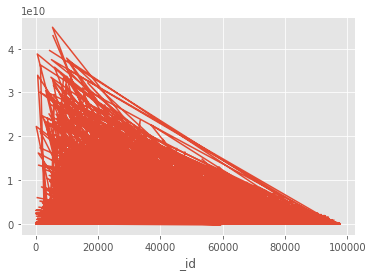

In [ ]:
df['value.diff'].plot()

Esto sólo calcula el tiempo mínimo de cada pregunta a su respuesta. Después habría que aplicar lo visto en otros ejemplos para calcular la media. Con agregación, a continuación, sí que se puede calcular la media de forma relativament sencilla:

In [ ]:
min_answer_time = db.posts.aggregate([
    {"$match" : {"PostTypeId" : 2}},
    {
        '$group' : {'_id' : '$ParentId',
                   # 'answers' : { '$push' : {'Id' : "$Id", 'CreationDate' : "$CreationDate"}},
                    'min' : {'$min' : "$CreationDate"}
                    }
    },
    { "$lookup" : {
        'from': "posts", 
        'localField': "_id",
        'foreignField': "Id",
        'as': "post"}
    },
    { "$unwind" : "$post"},
    {"$project" :
        {"_id" : True,
        "min" : True,
        #"post" : True,
        "diff" : {"$subtract" : ["$min", "$post.CreationDate"]}}
    },
    #    { "$sort" : {'_id' : 1} }
    {
        "$group" :  {
            "_id" : None,
            "avg" : { "$avg" : "$diff"}
        }
    }
])
min_answer_time = list(min_answer_time)
min_answer_time

[{'_id': None, 'avg': 418295789.4568075}]

## EJERCICIO: Con Map-Reduce, construir las colecciones que asocian un usuario con las preguntas que ha hecho de cada tags y dado un tag, qué usuarios han hecho preguntas de ese tag (E1).

### Construcción de la colección que asocia un usuario con las preguntas que ha hecho de cada tag. 
#### El par clave-valor está formado por:

*   La clave: está formada por un diccionario que contiene el OwnerUserId y el Tag.
*   El valor: está formado por una lista que contiene las preguntas que ha hecho sobre ese tag. 

In [ ]:
question_map = Code('''
function () {
  var tags = this.Tags.replace(/></g, "> <");
  tags = tags.split(" "); //Array con los tags de cada pregunta
  for (var i = 0; i < tags.length; i++) {
    var key = {OwnerUserId: this.OwnerUserId, tag: tags[i]};
    var value = this;
    emit(key, value);
}
};
''')

question_reduce = Code('''
function (key, values) {
    var tags_with_posts = [];

    tags_with_posts = tags_with_posts.concat(values);
 
    return tags_with_posts
}
''')

db.posts.map_reduce(question_map, question_reduce, "post_tags", query={"PostTypeId": {"$eq": 1}})

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow'), 'post_tags')

**Ejemplo**

In [ ]:
list(db.post_tags.find({'_id': {'OwnerUserId': 21, 'tag': '<delphi>'}}))

[{'_id': {'OwnerUserId': 21.0, 'tag': '<delphi>'},
  'value': [[{'AcceptedAnswerId': 22715,
     'AnswerCount': 1,
     'Body': "<p>Tengo dos registros con los mismos campos, y uno de ellos tiene un conjunto de métodos. Siendo, de hecho, diferentes, ¿Por qué <code>SizeOf</code> devuelve el mismo valor para ambos?</p><br/><br/><pre><code>{$APPTYPE CONSOLE}<br/><br/>{$R *.res}<br/><br/>uses<br/>  System.SysUtils;<br/><br/>type<br/>  TData = record<br/>    Age : Byte;<br/>    Id  : Integer;<br/>  end;<br/><br/>  TData2 = record<br/>    Age : Byte;<br/>    Id  : Integer;<br/>    procedure foo1;<br/>    procedure foo2;<br/>    procedure foo3;<br/>  end;<br/><br/>procedure TData2.foo1;<br/>begin<br/><br/>end;<br/><br/>procedure TData2.foo2;<br/>begin<br/><br/>end;<br/><br/>procedure TData2.foo3;<br/>begin<br/><br/>end;<br/><br/>begin<br/>  try<br/>    Writeln('SizeOf(TData) = '+ IntToStr(SizeOf(TData)));<br/>    Writeln('SizeOf(TData2) = '+ IntToStr(SizeOf(TData2)));<br/>    Readln;<br/>  ex

### Contrucción de la colección que asocia cada tag con los usuarios que han hecho preguntas de ese tag. 
### El par clave-valor está formado por:


*   La clave: Tag.
*   El valor: una lista de los OwnerUserId que hicieron preguntas del tag correspondiente.




In [ ]:
tag_map = Code('''
function () {
  var tags = this.Tags.replace(/></g, "> <");
  tags = tags.split(" "); //Array con los tags de cada pregunta
  for (var i = 0; i < tags.length; i++) {
    var key = tags[i];
    var value = this.OwnerUserId;
    emit(key, value);
}
};
''')

tag_reduce = Code('''
function (key, values) {
    var tags_with_owneruserid = [];
    tags_with_owneruserid = tags_with_owneruserid.concat(values); 
    return [...new Set (tags_with_owneruserid)] }
''')

db.posts.map_reduce(tag_map, tag_reduce, "tags_owneruserid", query={"PostTypeId": {"$eq": 1}})

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow'), 'tags_owneruserid')

In [ ]:
list(db.tags_owneruserid.find({ '_id' : '<apache>'}))

[{'_id': '<apache>',
  'value': [56804.0,
   24684.0,
   13005.0,
   56057.0,
   48558.0,
   55492.0,
   26789.0,
   54489.0,
   52034.0,
   10421.0,
   14243.0,
   53671.0,
   35187.0,
   52328.0,
   5997.0,
   52036.0,
   23610.0,
   51349.0,
   46570.0,
   50132.0,
   49661.0,
   30876.0,
   48932.0,
   48007.0,
   47756.0,
   47705.0,
   47637.0,
   38428.0,
   9179.0,
   46614.0,
   46588.0,
   44189.0,
   46522.0,
   46453.0,
   45401.0,
   9885.0,
   44793.0,
   44020.0,
   20293.0,
   43843.0,
   25360.0,
   42483.0,
   27712.0,
   41562.0,
   30226.0,
   22084.0,
   41017.0,
   40917.0,
   40022.0,
   27826.0,
   19864.0,
   26914.0,
   38044.0,
   37892.0,
   4321.0,
   24137.0,
   35835.0,
   19356.0,
   872.0,
   33381.0,
   33154.0,
   4026.0,
   14287.0,
   12625.0,
   27916.0,
   32388.0,
   32271.0,
   32203.0,
   32146.0,
   26872.0,
   29516.0,
   4961.0,
   4610.0,
   29269.0,
   28700.0,
   28545.0,
   27908.0,
   371.0,
   4918.0,
   25512.0,
   25535.0,
   25241.0

## EJERCICIO: Con el Framework de Agregación, generar la colección `StackOverflowFacts` vista en la sesión 2 (E2).

### Se seleccionan los campos de interés y se agrega uno adicional: el tipo. El mismo indica si el registro se refiere a la creación de un usuario, a la emisión de un voto, a la creación de un comentario, a la realización de una pregunta o una respuesta.

In [ ]:
posts.aggregate([
                 {'$project' : { '_id':0, 'PostId' : '$Id', 'CreationDate':True,  'OwnerUserId':True, 'PostTypeId':True }},
                 {'$addFields': {'type':  { '$cond': [{'$eq': [ "$PostTypeId", 1 ]}, 'question', 'not_question']}  }},
                 {'$unionWith': { 'coll': "users", 'pipeline': [{'$project' : { '_id':0, 'UserId' : '$Id', 'CreationDate':True}},{'$addFields': {'type': 'user'}}]}},
                 {'$unionWith': { 'coll': "comments", 'pipeline': [{'$project' : { '_id':0, 'CommentId' : '$Id', 'CreationDate':True, 'OwnerCommentId': '$UserId'}},{'$addFields': {'type': 'comment' }}]}},
                 {'$unionWith': { 'coll': "votes", 'pipeline': [{'$project' : { '_id':0, 'VoteId' : '$Id', 'CreationDate':True, 'OwnerVoteId':'$UserId'}},{'$addFields': {'type': 'vote'}}]}},
                 {'$out': "StackOverFlowFacts"}
                           
                 ])



**Ejemplo de voto**

In [ ]:
list(db.StackOverFlowFacts.find())[-90]


{'CreationDate': datetime.datetime(2017, 8, 26, 0, 0),
 'OwnerVoteId': 24137,
 'VoteId': 186329,
 '_id': ObjectId('5fb93a1408210fca39eb41f4'),
 'type': 'vote'}

**Ejemplo de pregunta**

In [ ]:
list(db.StackOverFlowFacts.find())[2]

{'CreationDate': datetime.datetime(2015, 10, 29, 23, 54, 31, 947000),
 'OwnerUserId': 21,
 'PostId': 3,
 'PostTypeId': 1,
 '_id': ObjectId('5fb93a1208210fca39e4eece'),
 'type': 'question'}

## EJERCICIO: Con Map-Reduce, implementar la consulta RQ3 de la sesión 2.

In [ ]:
mapcode = Code("""
function () {
    if (this.PostTypeId == 2)
        emit(this.OwnerUserId, {q: 0, a: 1, porcentaje: null})
    else if (this.PostTypeId == 1)
        emit(this.OwnerUserId, {q: 1, a: 0, porcentaje: null})
}
""")

reducecode = Code("""
function (key, values) {
    q = 0 // Pregunta
    a = 0 // Respuesta 
  
    values.forEach(function(v) {
        if (v.q != 0) // Pregunta
            q += v.q
        if (v.a != 0) // Respuesta
            a += v.a
        }
    )

    return {q: q, a: a, porcentaje: a/(q+a)*100}
}
""")

db.posts.map_reduce(mapcode, reducecode, "porcentaje_respuestas")
porcentaje = list(db.porcentaje_respuestas.find())
df_porcentaje = json_normalize(porcentaje)
df_porcentaje 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,_id,value.q,value.a,value.porcentaje
0,5832,0.0,1.0,100.0
1,41618,0.0,1.0,100.0
2,49614,0.0,1.0,100.0
3,45590,1.0,0.0,0.0
4,46774,3.0,0.0,0.0
...,...,...,...,...
14499,47336,1.0,0.0,0.0
14500,55407,2.0,0.0,0.0
14501,27800,1.0,0.0,0.0
14502,17539,0.0,1.0,100.0


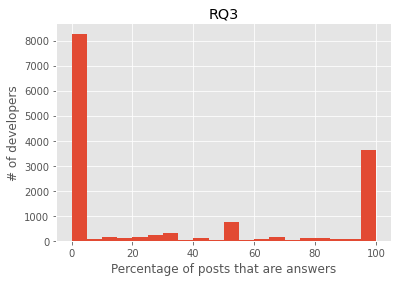

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_porcentaje['value.porcentaje'], bins=20)
plt.xlabel('Percentage of posts that are answers')
plt.ylabel('# of developers')
plt.title('RQ3')
plt.show()

## EJERCICIO (difícil, opcional): Con Agregación, calcular, enla tabla `StackOverflowFacts` la media de tiempo que pasa desde que los usuarios se registran hasta que publican su primera pregunta.

In [ ]:
db.StackOverFlowFacts.aggregate([
    {"$match" : {"type" : 'question'}},
        {
        '$group' : {'_id' : '$OwnerUserId',
                    'first' : {'$min' : "$CreationDate"}
                    }
    }, 
     
     {"$out" : "first_question"}


])


Cada documento tiene un campo **_id** que es el OwnerUserId y un campo **first** que es la fecha de la primera pregunta.

In [ ]:
list(db.first_question.find())[0]

{'_id': 1136, 'first': datetime.datetime(2016, 3, 22, 20, 2, 25, 157000)}

In [ ]:
db.StackOverFlowFacts.aggregate([
        {"$match" : {"type" : 'user'}},                        
        {'$lookup': {
            'from': "first_question", 
            'localField': "UserId",
            'foreignField': "_id",
            'as': "user"
            }
        },
        {
            '$unwind' : '$user'
        },
        {"$project" :
         {"_id" : False,
          "first" : True,
          "diff" : {'$divide' : [ {"$subtract" : ["$user.first", "$CreationDate"]}, 1000]}
                    
          
          }
         },
        
        {
        "$group" :  {
                     "_id" : None,
                     "avg" : { "$avg" : "$diff"}
                    }
        },
        

        {"$out" : "first_question_date_and_user_creation_date"}

    ])


**Respuesta en segundos**

In [ ]:
list(db.first_question_date_and_user_creation_date.find())[0]['avg']

1536940.0048161624

**Respuesta en días**

In [ ]:
list(db.first_question_date_and_user_creation_date.find())[0]['avg']/(3600*24)

17.788657463150027